In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# c) Discretización del dominio:

def discretize_domain(N=1000, x_min=-5, x_max=5):
    return np.linspace(x_min, x_max, N)

# d) Función del potencial:

def potential(x):
    m = 1
    omega = 1
    return 0.5 * m * omega**2 * x**2

# f) Método de Numerov:

def numerov_method(x, E):
    h = x[1] - x[0]
    psi = np.zeros_like(x)
    psi[1] = 1e-5
    
    # Rn y Sn
    R = 2 * (potential(x) - E)
    S = np.zeros_like(x) 
    
    for n in range(1, len(x) - 1):
        term1 = (1 - h**2 * R[n+1] / 12)
        term2 = 2 * (1 + 5 * h**2 * R[n] / 12)
        term3 = (1 - h**2 * R[n-1] / 12)
        source_term = h**2 / 12 * (S[n+1] + 10 * S[n] + S[n-1])
        
        psi[n+1] = (term2 * psi[n] - term3 * psi[n-1] + source_term) / term1
        
    return psi

In [3]:
# f) Búsqueda de valores propios de energía (Se demora como 25 segundos UnU)

def find_eigenvalues(x, E_min, E_max, dE=0.001):
    eigenvalues = []
    previous_psi_end = numerov_method(x, E_min)[-1]
    
    E = E_min + dE
    while E <= E_max:
        current_psi_end = numerov_method(x, E)[-1]
        
        # Comprobar cambio de signo
        if previous_psi_end * current_psi_end < 0:
            eigenvalues.append(E)
            if len(eigenvalues) == 6:  #6 valores propios
                break
        
        previous_psi_end = current_psi_end
        E += dE
        
    return eigenvalues

# Ejecución del código
x = discretize_domain()
eigenvalues = find_eigenvalues(x, E_min=0, E_max=10)
print(f"Valores propios de energía estimados: {eigenvalues}")

Valores propios de energía estimados: [0.5010000000000003, 1.5009999999999455, 2.5009999999998356, 3.5009999999997254, 4.500999999999838, 5.501000000000172]


In [4]:
# g) Búsqueda de valores propios de energía centrados en los valores teóricos

def find_eigenvalues(x, expected_E_values, dE=0.01):
    eigenvalues = []
    
    for E_expected in expected_E_values:
        E_range = np.arange(E_expected - dE, E_expected + dE, dE/100)
        previous_psi_end = numerov_method(x, E_range[0])[-1]
        
        for E in E_range[1:]:
            current_psi_end = numerov_method(x, E)[-1]
            
            # Comprobar cambio de signo
            if previous_psi_end * current_psi_end < 0:
                eigenvalues.append((E + E - dE/100) / 2)
                break
            
            previous_psi_end = current_psi_end
        
    return eigenvalues

# Ejecución del código
x = discretize_domain()
expected_E_values = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
eigenvalues = find_eigenvalues(x, expected_E_values)
print(f"Valores propios de energía estimados: {eigenvalues}")

Valores propios de energía estimados: [0.5000499999999989, 1.5000499999999988, 2.5000500000000216, 3.5000500000000216, 4.500049999999977, 5.500049999999977]


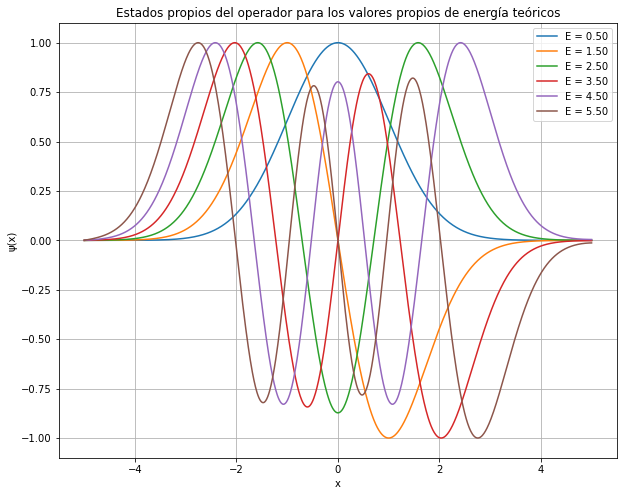

In [5]:
# h) Dibujar los estados propios del operador

def normalize_wavefunction_to_max(psi):
    """Normaliza la función de onda al valor máximo."""
    return psi / np.max(np.abs(psi))

def plot_eigenstates(x, theoretical_eigenvalues):
    plt.figure(figsize=(10, 8))
    
    for E in theoretical_eigenvalues:
        psi = numerov_method(x, E)
        
        # Normalizar la función de onda al valor máximo
        psi = normalize_wavefunction_to_max(psi)
        
        plt.plot(x, psi, label=f'E = {E:.2f}')
    
    plt.title('Estados propios del operador para los valores propios de energía teóricos')
    plt.xlabel('x')
    plt.ylabel('\u03C8(x)')
    #plt.xlim([-6, 6])
    #plt.ylim([-1, 1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Valores propios de energía teóricos
theoretical_eigenvalues = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Ejecución del código
x = discretize_domain()
plot_eigenstates(x, theoretical_eigenvalues)


Valores propios de energía estimados: [0.5000499999999989, 1.5000499999999988, 2.5000500000000216, 3.5000500000000216, 4.500049999999977, 5.500049999999977]


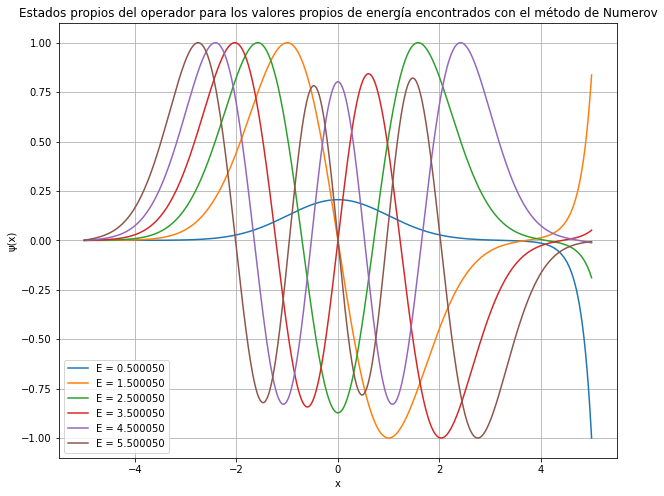

In [6]:
# h) Dibujar los estados propios del operador

def plot_eigenstates(x, eigenvalues):
    plt.figure(figsize=(10, 8))
    
    for E in eigenvalues:
        psi = numerov_method(x, E)
        
        # Normalizar la función de onda
        psi = psi / max(abs(psi))
        
        plt.plot(x, psi, label=f'E = {E:.6f}')
    
    plt.title('Estados propios del operador para los valores propios de energía encontrados con el método de Numerov')
    plt.xlabel('x')
    plt.ylabel('\u03C8(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecución del código
x = discretize_domain()
eigenvalues = find_eigenvalues(x, expected_E_values)
print(f"Valores propios de energía estimados: {eigenvalues}")
plot_eigenstates(x, eigenvalues)

#### La primera gráfica muestra los estados propios para los valores propios de energía teóricos en un oscilador armónico cuántico. La segunda, los encontrados con el método de Numerov. Estos últimos poseen un cierto error de orden O(h^6) expresado explícitamente en la ecuación. Es por esto que las gráficas difieren un poco, sobre todo para x > 3 y en el caso particular de E=0.5.

In [7]:
# g) Estados ligados del operador para el potencial gaussiano

def gaussian_potential(x):
    return -10 * np.exp(-x**2 / 20)


def numerov_method_gaussian(x, E):
    h = x[1] - x[0]
    N = len(x)
    psi = np.zeros(N)
    psi[1] = 1e-5

    k2 = 2.0 * (E - gaussian_potential(x))
    
    for n in range(1, N-1):
        term1 = 1 + h**2 * k2[n+1] / 12
        term2 = 2 * psi[n] * (1 - 5 * h**2 * k2[n] / 12)
        term3 = psi[n-1] * (1 + h**2 * k2[n-1] / 12)
        psi[n+1] = (term2 - term3) / term1
        
    return psi

def find_bound_states(x, E_range, dE=0.01):
    bound_states = []
    previous_psi_end = numerov_method_gaussian(x, E_range[0])[-1]
    
    for E in E_range[1:]:
        current_psi_end = numerov_method_gaussian(x, E)[-1]
        
        # Comprobar cambio de signo
        if previous_psi_end * current_psi_end < 0:
            bound_states.append((E + E - dE) / 2)
            if len(bound_states) == 5:
                break
            
        previous_psi_end = current_psi_end
        
    return bound_states

# Ejecución del código
x = discretize_domain()
E_range = np.arange(-10, 0, 0.01)  # Rango de energías a considerar
bound_states = find_bound_states(x, E_range)
print(f"Los primeros cinco estados ligados son: {bound_states}")

Los primeros cinco estados ligados son: [-9.505000000000011, -8.545000000000032, -7.625000000000051, -6.745000000000069, -5.8950000000000875]


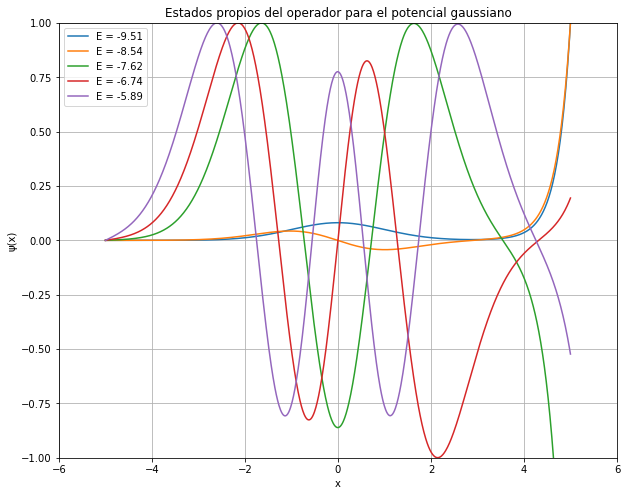

In [8]:
# Estados propios del operador para el potencial gaussiano

def plot_eigenstates_gaussian(x, eigenvalues):
    plt.figure(figsize=(10, 8))
    
    for E in eigenvalues:
        psi = numerov_method_gaussian(x, E)
        
        # Normalizar la función de onda al valor máximo
        psi = psi / max(psi)
        
        plt.plot(x, psi, label=f'E = {E:.2f}')
    
    plt.title('Estados propios del operador para el potencial gaussiano')
    plt.xlabel('x')
    plt.ylabel('\u03C8(x)')
    plt.xlim([-6, 6])
    plt.ylim([-1, 1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Valores propios de energía teóricos para el potencial gaussiano
eigenvalues_gaussian = [-9.51, -8.54, -7.62, -6.74, -5.89]

# Ejecución del código
x = np.linspace(-5, 5, 1000)
plot_eigenstates_gaussian(x, eigenvalues_gaussian)

#### Nuevamente, se presenta un error en los estados propios para este caso, debido a que estados ligados encontrados por el método de Numerov no son exactos.

In [47]:
def rational_potential(x):
    return -4 / (1 + x**2)**2

def numerov_method_rational(x, E):
    h = x[1] - x[0]
    N = len(x)
    psi = np.zeros(N)
    psi[1] = 1e-5

    R = 2.0 * (E - rational_potential(x))
    S = np.zeros_like(x) 
    
    for n in range(1, len(x) - 1):
        term1 = (1 - h**2 * R[n+1] / 12)
        term2 = 2 * (1 + 5 * h**2 * R[n] / 12)
        term3 = (1 - h**2 * R[n-1] / 12)
        source_term = h**2 / 12 * (S[n+1] + 10 * S[n] + S[n-1])
        
        psi[n+1] = (term2 * psi[n] - term3 * psi[n-1] + source_term) / term1
        
    return psi

def find_bound_states(x, E_range, dE=0.01):
    bound_states = []
    previous_psi_end = numerov_method_rational(x, E_range[0])[-1]
    
    for E in E_range[1:]:
        current_psi_end = numerov_method_rational(x, E)[-1]
        
        # Comprobar cambio de signo
        if previous_psi_end * current_psi_end < 0:
            bound_states.append((E + E - dE) / 2)
            if len(bound_states) == 2:
                break
            
        previous_psi_end = current_psi_end
        
    return bound_states

# Ejecución del código
x = discretize_domain()
E_range = np.arange(-2, 1, 0.01)  # Rango de energías a considerar
bound_states = find_bound_states(x, E_range)
print(f"Los dos estados ligados son: {bound_states}")

Los dos estados ligados son: [-1.114999999999999, -1.104999999999999]
